# Problem Set 4, due February 23 at 11:59am, mid-day, noon.

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions.
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 3.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [96]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import sklearn

import time
from __future__ import division

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from matplotlib import pyplot, pylab
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

from sklearn.cross_validation import train_test_split

In [97]:
from sklearn.datasets import load_boston
bdata = load_boston()

In [98]:
# creaing dataframe in pandas
bostonDF = DataFrame(bdata.data)

#creating labels
bostonDF.columns = bdata.feature_names

#creating column for price
bostonDF['MEDV'] = bdata.target

---

## Part 1: Getting oriented

Use different learning rates

### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [99]:
# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.keys()
# print bdata.feature_names
# print bdata.data.shape
# print bdata.target.shape
# print bdata.DESCR




In [100]:
# regressing the housing price on the number of rooms per house,
bostonDF_model_LR1 = smf.ols(formula='MEDV~RM', data =bostonDF).fit()

# checking the params
bostonDF_model_LR1.params

Intercept   -34.670621
RM            9.102109
dtype: float64

In [101]:
# creating new col for number of rooms squared
bostonDF['RM2'] = bostonDF['RM']**2

# regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.
bostonDF_model_LR2 = smf.ols(formula='MEDV ~RM+RM2', data =bostonDF).fit()

#printing
bostonDF_model_LR2.params

Intercept    66.058847
RM          -22.643262
RM2           2.470124
dtype: float64

1. In case 1, the coefficient is 9.1, which means that an increase in 1 room will increase the price by $9.1k.
2. In case 2, there seems to be a non linear relationship

*Enter your observations here*

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 250-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 250 slope coefficients using a histogram with 25 bins, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

In [102]:
from sklearn.cross_validation import KFold

# creating features & output
X = bostonDF["RM"]
y = bostonDF["MEDV"]

#?KFOLD
kf = KFold(506,n_folds=250)


# training and testing sets
X_train = []
y_train = []
X_test = []
y_test = []

for train_ind, test_ind in kf:
    X_train.append(X[train_ind])
    y_train.append(y[train_ind])
    X_test.append(X[test_ind])
    y_test.append(y[test_ind])
    
# reshaping to matrix
for j in range(250):
    if j < 6:
        X_train[j] = X_train[j].reshape(503,1)
        y_train[j] = y_train[j].reshape(503,1)
        X_test[j] = X_test[j].reshape(3,1)
        y_test[j] = y_test[j].reshape(3,1)
    else:
        X_train[j] = X_train[j].reshape(504,1)
        y_train[j] = y_train[j].reshape(504,1)
        X_test[j] = X_test[j].reshape(2,1)
        y_test[j] = y_test[j].reshape(2,1)
        
# creating an array to store results
Results_LR =[]
for j in range(250):
    LR = LinearRegression()
    Results_LR.append(LR.fit(X_train[j], y_train[j])) 
    
# creating an array to store corresponding slopes 
Results_LR_Slopes =[]
for i in range(250):
    Results_LR_Slopes.append(Results_LR[i].coef_[0][0])

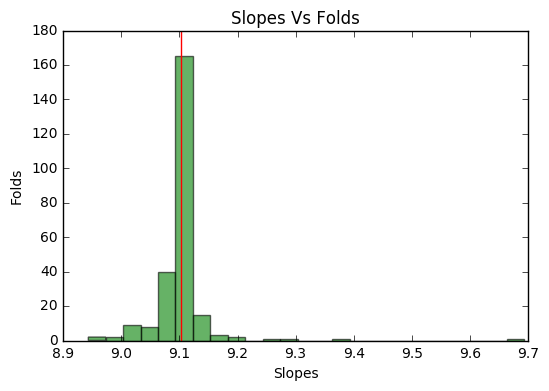

In [103]:
#creating histogram   
plt.hist(Results_LR_Slopes,bins=25,color='green',alpha=0.6)
plt.axvline(x=bostonDF_model_LR1.params[1],color = "red")

#Creating labels
pylab.xlabel("Slopes")
pylab.ylabel("Folds")
pylab.title('Slopes Vs Folds')

*Enter your observations here*

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

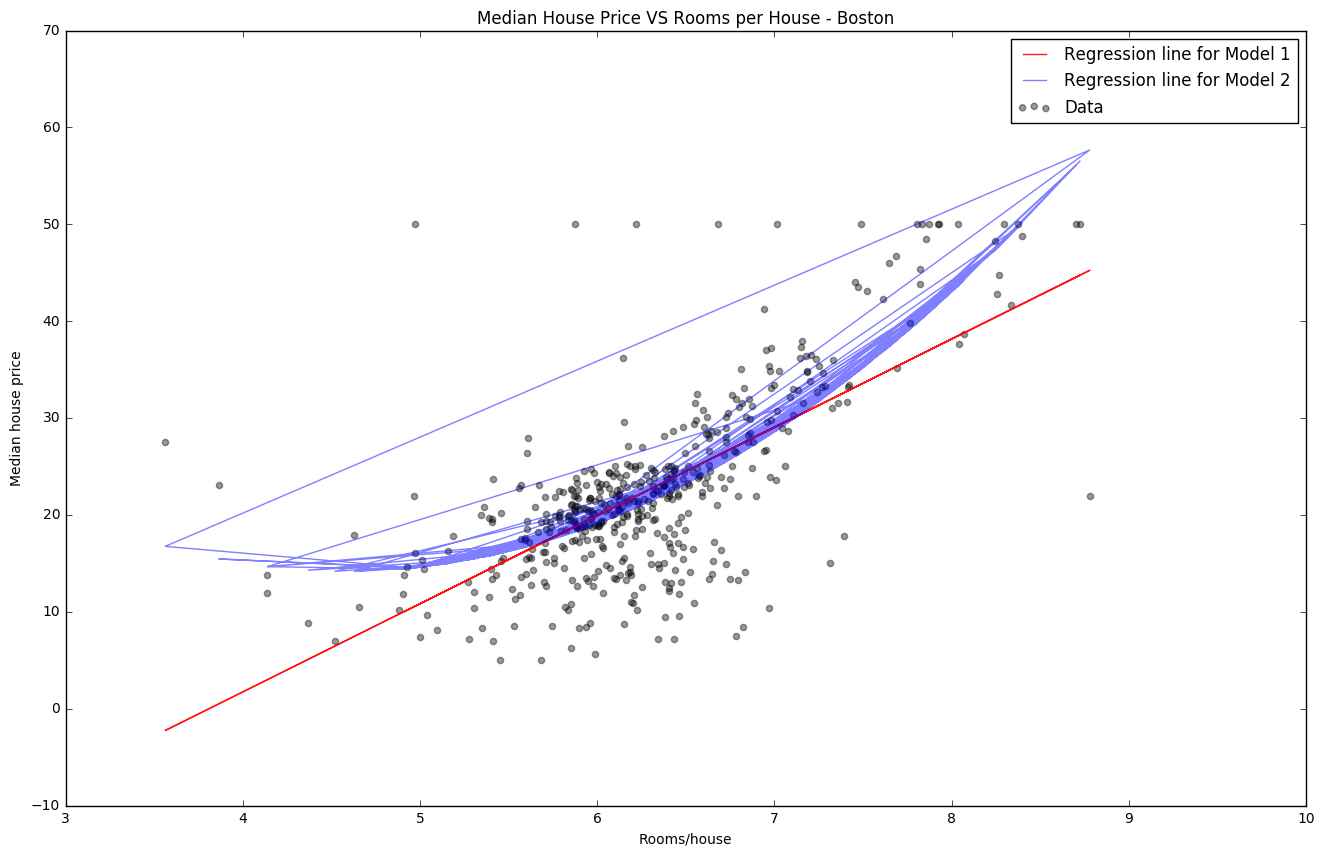

In [104]:
# Creating figure and assigning size
fig, ax = plt.subplots(figsize=(16, 10))

#plotting scatterplot
ax.scatter(bostonDF['RM'], bostonDF['MEDV'], alpha=0.4, color='black', label ='Data')

#Adding regression line for first model
ax.plot(bostonDF['RM'], bostonDF_model_LR1.params[0] + (bostonDF_model_LR1.params[1]*bostonDF['RM']), alpha=0.9, 
        color='red', label = 'Regression line for Model 1')

#Adding second regression line for model 2
ax.plot(bostonDF['RM'], 
           bostonDF_model_LR2.params[0] + (bostonDF_model_LR2.params[1]*bostonDF['RM']) + (bostonDF_model_LR2.params[2]*((bostonDF['RM'])**2)), 
           alpha=0.5,  color='blue', label = 'Regression line for Model 2')

#Adding labels
pylab.ylabel('Median house price')
pylab.xlabel('Rooms/house')
pylab.title('Median House Price VS Rooms per House - Boston')

#adding legends
pylab.legend(loc='best')

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [112]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
al0: float
    intercept
    
bt0: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    #initializing params
    start_time = time.time()
    condi = False #initial condition is set as FALSE
    it = 0 #Initial value for iteration
    n = len(xvalues) 
    
    # initial values for alpha & beta
    al0 = 10
    bt0 = 8
    
    sum_l = 0
    for i in range(n):
        sum_l += (al0 + bt0*xvalues[i] - yvalues[i])**2
        
    l = sum_l

    while not condi:

        sum_al0 = 0
        for i in range(n):
            sum_al0 += (al0 + bt0*xvalues[i] - yvalues[i])
            
        sum_bt0 = 0
        for j in range(n):
            sum_bt0 += (al0 + bt0*xvalues[j] - yvalues[j])*xvalues[j]    
        
        # bringing in learning rate
        temp_al0 = al0 - R*sum_al0*(1/n)
        temp_bt0 = bt0 - R*sum_bt0*(1/n)
        
        al0 = temp_al0
        bt0 = temp_bt0
        
        e = 0
        for k in range(n):
            e += (al0 + bt0*xvalues[k] - yvalues[k])**2
            
        
        if(abs(l-e) <= 0.001):
            print ("converged after iterations",it)
            condi = True #Changing the condition val so loop can run
            
        # updating error
        l = e
        
        #updating iterations 
        it += 1
        
        if it == MaxIterations:
            print ("Max Iterations")
            condi = True  #changing condi for loop to run
    
    print ('Time taken:',' ', str(round(time.time() - start_time,2)) ,'seconds')
    return al0, bt0

# example function call
# print (bivariate_ols(X, Y, 0.01, 100000))

In [113]:
#For r=0.001
print ('For R = 0.001')
print (bivariate_ols(bostonDF['RM'], bostonDF['MEDV'],0.001,1000))

#For r=0.01
print ("\n For R = 0.01 \n")
print (bivariate_ols(bostonDF['RM'], bostonDF['MEDV'],0.01,1000))

#for R=0.1
print ("\n For R = 0.1 \n")
print (bivariate_ols(bostonDF['RM'], bostonDF['MEDV'],0.1,1000))

For R = 0.001
Max Iterations
Time taken:   34.74 seconds
(8.5687047856375269, 2.3046677929680524)

 For R = 0.01 

Max Iterations
Time taken:   40.97 seconds
(4.1336658209751063, 3.0018784024731073)

 For R = 0.1 

Max Iterations
Time taken:   34.27 seconds
(nan, nan)


1. The function converges after 33,000 iterations,giving the correct slope and intercept.

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [114]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [115]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    
    xm = xvalue_matrix
    
    yl = len(yvalues) # length of dependant variable matrix
    
    eps = 0.0001 #value of epsilon
    
    n = len(xm.T) # taking the length of transposed matrix
    
    # array of coefficients
    th0 = np.array([10]*n)
    th0 = th0.reshape(-1,1)
    
    # transposing input
    xTran = xm.transpose()
    
    # reshaping
    ym = yvalues.reshape(-1,1)
    
    # calculating yhat
    yhat = np.dot(xm, th0)
    
    # calculating the loss
    e = yhat - ym
    
    # calculating the cost
    Jc = np.sum(e**2)
    
    #setting the condition
    converge = False
    
    #setting iteration
    it=0
    
    while not converge: 

        # avg val of gradient
        grad = np.dot(xTran, e) / yl
        
        # updating theta
        th0 = th0 - R * grad
        
        # updating hypothesis
        yhat = np.dot(xm, th0)
        
        # updating loss 
        e = yhat - ym
        
        # updating cost
        cost = np.sum(e**2)

        if abs(Jc - cost) <= eps:
            print ('Converged after iterations:: ', it)
            converge = True #changing condition

        else:
            Jc = cost
        if it == MaxIterations:
            print ('Max iterations')
            converge = True #changind the condition
        it = it+1 #incrementing iteration value
        
    #printing runtime
    print ("Time taken: " , str(round(time.time() - start_time,2)) , " seconds")
    return th0 #returing theta value

In [116]:
#creating input matrix for x_matrix
x_mat = np.ones((506, 3, ))

#standardizing RM
x_mat[:,1:2] = standardize(bostonDF['RM']).reshape(506,1)

#standardizing CRIM
x_mat[:,2:3] = standardize(bostonDF['CRIM']).reshape(506,1)

# for R= 0.1
print ('For R = 0.1', '\n')
print (multivariate_ols(x_mat,bostonDF['MEDV'],0.1,10000))

#for R=0.01
print ('\n For R = 0.01','\n')
print (multivariate_ols(x_mat,bostonDF['MEDV'], 0.01, 10000))

# for R=0.001
print ("\n For R = 0.001",'\n')
print (multivariate_ols(x_mat, bostonDF['MEDV'], 0.001, 10000))

For R = 0.1 

Converged after iterations::  113
Time taken:  0.0  seconds
[[ 22.53273017]
 [  5.89519421]
 [ -2.24782868]]

 For R = 0.01 

Converged after iterations::  1018
Time taken:  0.02  seconds
[[ 22.53235932]
 [  5.89720009]
 [ -2.24579562]]

 For R = 0.001 

Converged after iterations::  8754
Time taken:  0.15  seconds
[[ 22.5308389 ]
 [  5.90314339]
 [ -2.23969647]]


#### Analysis:
1. Value of coefficients is almost the same.
2. Lower the learning rate, higher the number of iterations before convergence.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [117]:
# unstandardized data
x_mat = np.ones((506, 3, ))

x_mat[:,1:2] = (bostonDF['RM']).reshape(506,1)
x_mat[:,2:3] = (bostonDF['CRIM']).reshape(506,1)

#for R=0.001
print ('\n For R = 0.001','\n')
print (multivariate_ols(x_mat, bostonDF['MEDV'], 0.001,1000000))

#for R= 0.01
print ("\n For R = 0.01",'\n')
print (multivariate_ols(x_mat, bostonDF['MEDV'], 0.01,1000000))


 For R = 0.001 

Converged after iterations::  336660
Time taken:  5.34  seconds
[[-28.42492053]
 [  8.26126066]
 [ -0.26475149]]

 For R = 0.01 

Converged after iterations::  43941
Time taken:  0.73  seconds
[[-29.02447588]
 [  8.35444689]
 [ -0.26274883]]


#### Analysis:
1. Value of coeffs is visibly different from earlier. 
2. Values of coeffs are not as stable as earlier and vary as R changes.
3. Unstandardized values take more iterations and time to converge.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, it would be wise for you to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

In [118]:
# creating the input matrix
x_mat = np.ones((506, 3, ))

#Standardizing the values
x_mat[:,1:2] = standardize(bostonDF['RM']).reshape(506,1)
x_mat[:,2:3] = standardize(bostonDF['CRIM']).reshape(506,1)

# setting output as Median price val
y_mat = bostonDF['MEDV']

#creating test set and train set
X_train, X_test, y_train, y_test = train_test_split(x_mat, y_mat, test_size=0.34, random_state = 5)

bostonDF_model_MV = multivariate_ols(X_train, y_train, 0.01, 10000)
bostonDF_model_MV

Converged after iterations::  998
Time taken:  0.03  seconds


array([[ 22.45804901],
       [  6.02338556],
       [ -2.70739531]])

#### Analysis:
1. This is the same as the reuslts for 2.3

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above and compare the actual to the predicted values for just the test instances. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

In [119]:
# computing RMSE
def compute_rmse(preds,yvals):
    if len(np.array(preds)) == len(np.array(yvals)):
        RMSE = np.sqrt(np.mean((np.array(preds)-np.array(yvals))**2))
    else:
        print('array length not equal')
        return -1
    return RMSE

# creating array to store predictions
y_preds = []

# appending the array
for j in range(len(X_test)):
    y_preds.append((bostonDF_model_MV[0] + bostonDF_model_MV[1]*X_test[j][1] + bostonDF_model_MV[2]*X_test[j][2])[0])
    
# storing actual values in list
y_act = []

# appending test values to this array
for i in y_test.index:
    y_act.append(y_test[i])
    
    
compute_rmse(y_preds, y_act)

7.1082223440812164

The RMSE values computed using KNN were about the same as this RMSE value i.e. 7.11

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $400,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

*Discuss your results here*

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have *K+K^2/2* features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [120]:
# creating new DataFrame
bostonDF_new = DataFrame(bdata.data)

# labeling columns
bostonDF_new.columns = bdata.feature_names

#array for new features
features = [] 

for j in bostonDF_new.columns:
    features.append(j) #appending the array off columns
    
#creating new features    
for i in range(13):
    ftr1 = features[i]
    bostonDF_new[ftr1 + "*" + ftr1] = bostonDF_new[ftr1] * bostonDF_new[ftr1]
    k = i + 1
    for k in range(k,13):
        ftr2 = features[k]
        bostonDF_new[ftr1+"*"+ftr2] = bostonDF_new[ftr1] * bostonDF_new[ftr2]
        
# setting MEDV as target
bostonDF_new['MEDV'] = bdata.target

### 4.2 Let's overfit!
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those *K+K/2* features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [121]:
#creating new input with 15 features
x_mat = np.ones((506, 16, ))

#standardizing the data
x_mat[:,1:2] = standardize(bostonDF_new['RM']).reshape(506,1)
x_mat[:,2:3] = standardize(bostonDF_new['CRIM']).reshape(506,1)
x_mat[:,3:4] = standardize(bostonDF_new['DIS']).reshape(506,1)
x_mat[:,4:5] = standardize(bostonDF_new['RAD']).reshape(506,1)
x_mat[:,5:6] = standardize(bostonDF_new['TAX']).reshape(506,1)
x_mat[:,6:7] = standardize(bostonDF_new['PTRATIO']).reshape(506,1)
x_mat[:,7:8] = standardize(bostonDF_new['AGE']).reshape(506,1)
x_mat[:,8:9] = standardize(bostonDF_new['LSTAT']).reshape(506,1)

x_mat[:,9:10] = standardize(bostonDF_new['RM*LSTAT']).reshape(506,1)
x_mat[:,10:11] = standardize(bostonDF_new['CRIM*RM']).reshape(506,1)
x_mat[:,11:12] = standardize(bostonDF_new['CRIM*LSTAT']).reshape(506,1)
x_mat[:,12:13] = standardize(bostonDF_new['CRIM*PTRATIO']).reshape(506,1)
x_mat[:,13:14] = standardize(bostonDF_new['DIS*TAX']).reshape(506,1)
x_mat[:,14:15] = standardize(bostonDF_new['AGE*DIS']).reshape(506,1)
x_mat[:,15:16] = standardize(bostonDF_new['ZN*LSTAT']).reshape(506,1)


y_mat = bostonDF_new['MEDV']

# creating test and train sets
X_train, X_test, y_train, y_test = train_test_split(x_mat , y_mat, test_size=0.34, random_state = 5 )

In [122]:
# fitting the data in new model
bostonDF_model_MV2 = multivariate_ols(X_train, y_train, 0.01, 100000)

#printing the coeffs
bostonDF_model_MV2

Converged after iterations::  56266
Time taken:  0.98  seconds


array([[ 22.44432146],
       [  6.99763349],
       [  4.49147135],
       [ -1.70812017],
       [  1.53113237],
       [ -1.9664907 ],
       [ -1.28731044],
       [ -1.04101455],
       [ 15.80111177],
       [-16.90686489],
       [ -6.26472801],
       [ -5.24880117],
       [  5.49683818],
       [ -0.30529042],
       [  0.2765893 ],
       [  0.42280051]])

In [123]:
# storing predicted values on train set into an array
y_preds_train = []

#appeding the array:
for i in range(len(X_train)):
    y_preds_train.append((bostonDF_model_MV2[0] 
                       + bostonDF_model_MV2[1] * X_train[i][1] 
                       + bostonDF_model_MV2[2] * X_train[i][2]
                       + bostonDF_model_MV2[3] * X_train[i][3]
                       + bostonDF_model_MV2[4] * X_train[i][4]
                       + bostonDF_model_MV2[5] *X_train[i][5]
                       + bostonDF_model_MV2[6] * X_train[i][6]
                       + bostonDF_model_MV2[7] * X_train[i][7]
                       + bostonDF_model_MV2[8] * X_train[i][8]
                       + bostonDF_model_MV2[9] * X_train[i][9]
                       + bostonDF_model_MV2[10] * X_train[i][10]
                       + bostonDF_model_MV2[11] * X_train[i][11]
                       + bostonDF_model_MV2[12] * X_train[i][12]
                       + bostonDF_model_MV2[13] * X_train[i][13]
                       + bostonDF_model_MV2[14] * X_train[i][14]
                       + bostonDF_model_MV2[15] * X_train[i][15])[0])

# storing predicted values on test set into an array   
y_preds_test = []

#appending the array
for i in range(len(X_test)):
    y_preds_test.append((bostonDF_model_MV2[0] 
                       + bostonDF_model_MV2[1] * X_test[i][1] 
                       + bostonDF_model_MV2[2] * X_test[i][2]
                       + bostonDF_model_MV2[3] * X_test[i][3]
                       + bostonDF_model_MV2[4] * X_test[i][4]
                       + bostonDF_model_MV2[5] * X_test[i][5]
                       + bostonDF_model_MV2[6 ] * X_test[i][6]
                       + bostonDF_model_MV2[7] * X_test[i][7]
                       + bostonDF_model_MV2[8] * X_test[i][8]
                       + bostonDF_model_MV2[9] * X_test[i][9]
                       + bostonDF_model_MV2[10] *X_test[i][10]
                       + bostonDF_model_MV2[11] * X_test[i][11]
                       + bostonDF_model_MV2[12] * X_test[i][12]
                       + bostonDF_model_MV2[13] * X_test[i][13]
                       + bostonDF_model_MV2[14] * X_test[i][14]
                       + bostonDF_model_MV2[15] * X_test[i][15])[0])

In [124]:
compute_rmse(y_preds_train, y_train)

3.7636932206980815

In [125]:
compute_rmse ( y_preds_test, y_test )

4.9985235118860523

#### Analysis:

1. Models usually perform better on training set than on test. This is true here as RMSE value for test is higher.

*Discuss your results here*

### 4.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 3.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [126]:
"""
Function
--------
multivariate_ols_ridge
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols_ridge(xvalue_matrix, yvalues, R, L, MaxIterations):
    start_time=time.time() #start of runtime
    
    xm=xvalue_matrix 
    
    yl = len(yvalues) # length of dependant variable matrix
    
    eps = 0.0001 #value of epsilon
    
    n = len(xm.T) # taking the length of transposed matrix
    
    #array of coefficients
    th0 = np.array([10]*n)
    th0 = th0.reshape(-1,1)
    
    # transposing input
    xTran = xm.transpose()
    
    # reshaping
    ym = yvalues.reshape(-1,1)
    
     # calculating yhat
    yhat = np.dot(xm, th0)
    
    # calculating the loss
    e = yhat - ym
    
    # calculating the cost
    Jc = np.sum(e**2)
    
    #setting the condition
    converge = False
    
    #setting iteration
    it=0
    
    while not converge: 

        # avg val of gradient
        grad = np.dot(xTran, e) / yl
        
        #updating theta
        th0 = th0 - R * (grad + (L/ yl) * th0)
        
        # updating hypothesis
        yhat = np.dot(xm, th0)
        
        # updating loss 
        e = yhat - ym
        
        # updating cost
        cost = np.sum(e**2)

        if abs(Jc - cost) <= eps:
            print ('Converged after iterations:: ', it)
            converge = True #changing condition

        else:
            Jc = cost
        if it == MaxIterations:
            print ('Max iterations')
            converge = True #changind the condition
        it = it+1 #incrementing iteration value
        
    
    #printing runtime
    print ("Time taken: " , str(round(time.time() - start_time,2)) , " seconds")
    return th0 #returing theta value

In [127]:
#creating new input with 15 features
x_mat = np.ones((506, 16, ))

#standardizing the data
x_mat[:,1:2] = standardize(bostonDF_new['RM']).reshape(506,1)
x_mat[:,2:3] = standardize(bostonDF_new['CRIM']).reshape(506,1)
x_mat[:,3:4] = standardize(bostonDF_new['DIS']).reshape(506,1)
x_mat[:,4:5] = standardize(bostonDF_new['RAD']).reshape(506,1)
x_mat[:,5:6] = standardize(bostonDF_new['TAX']).reshape(506,1)
x_mat[:,6:7] = standardize(bostonDF_new['PTRATIO']).reshape(506,1)

y_mat = bostonDF_new['MEDV']

# creating test and train sets
X_train, X_test, y_train, y_test = train_test_split(x_mat , y_mat, test_size=0.34, random_state = 5 )

In [128]:
L = [0.001,0.005,0.1,0.5,0.7,1,3,5,7,10,13,15,20]

In [129]:
for l in L:
    bostonDF_model_MV2 = multivariate_ols_ridge(X_train, y_train, 0.01, l, 10000)

    y_preds = [] #creating array to store prediction values
    
    #appending the array
    for j in range(len(X_test)):
        y_preds.append((bostonDF_model_MV2[0] 
                       + bostonDF_model_MV2[1] * X_test[j][1] 
                       + bostonDF_model_MV2[2] * X_test[j][2]
                       + bostonDF_model_MV2[3] * X_test[j][3]
                       + bostonDF_model_MV2[4] * X_test[j][4]
                       + bostonDF_model_MV2[5] * X_test[j][5]
                       + bostonDF_model_MV2[6] * X_test[j][6])[0])
    
    y_act = [] #array of actual vals
    
    
    #appending the array
    for k in y_test.index:
        y_act.append(y_test[k])
    
    print ("RMSE for L = ", l )
    print (compute_rmse(y_preds, y_act))
    print ("\n")

Converged after iterations::  6656
Time taken:  0.13  seconds
RMSE for L =  0.001
21.653358177


Converged after iterations::  6662
Time taken:  0.14  seconds
RMSE for L =  0.005
21.6533462291


Converged after iterations::  6824
Time taken:  0.12  seconds
RMSE for L =  0.1
21.6530735711


Converged after iterations::  7422
Time taken:  0.12  seconds
RMSE for L =  0.5
21.6516752168


Converged after iterations::  7654
Time taken:  0.13  seconds
RMSE for L =  0.7
21.6508780255


Converged after iterations::  7924
Time taken:  0.13  seconds
RMSE for L =  1
21.6496308458


Converged after iterations::  8535
Time taken:  0.15  seconds
RMSE for L =  3
21.6415547904


Converged after iterations::  8459
Time taken:  0.14  seconds
RMSE for L =  5
21.634710844


Converged after iterations::  8210
Time taken:  0.14  seconds
RMSE for L =  7
21.628983247


Converged after iterations::  7752
Time taken:  0.13  seconds
RMSE for L =  10
21.6220203614


Converged after iterations::  7290
Time taken:  

#### Analysis:
1. The RMSE values decrease as L increases.
2. These values are considerably high than the previosuly computed values.

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a scatter plot that shows RMSE as a function of lambda.

*Discuss your results here*

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot

In [130]:
# Your code here

*Discuss your results here*